# 0. Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

# 1. Extract, Transform, Load (ETL)
## 1.1 Load Data

In [2]:
dataset = pd.read_csv('loans.csv')

In [3]:
dataset.head()

,credit.policy,loan_purpose,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


## 1.2 Data Dictionary

| No. |      Feature Name     |                                                                                                         Description                                                                                                         |   Type  |
|:---:|:---------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------:|
|  1  |     credit.policy     |                                                                1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.                                                                | Feature |
|  2  |      loan_purpose     |                                       The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").                                       | Feature |
|  3  |        int.rate       |                       The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.                      | Feature |
|  4  |      installment      |                                                                             The monthly installments owed by the borrower if the loan is funded.                                                                            | Feature |
|  5  |     log.annual.inc    |                                                                             The natural log of the self-reported annual income of the borrower.                                                                             | Feature |
|  6  |     debt_to_income    |                                                                     The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                                                     | Feature |
|  7  |          fico         |                                                                                            The FICO credit score of the borrower.                                                                                           | Feature |
|  8  |   days.with.cr.line   |                                                                                    The number of days the borrower has had a credit line.                                                                                   | Feature |
|  9  |       revol.bal       |                                                                The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                                                                | Feature |
|  10 |       revol.util      |                                                   The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).                                                   | Feature |
|  11 | recent_inq.last.6mths |                                                                            The borrower's number of inquiries by creditors in the last 6 months.                                                                            | Feature |
|  12 |    delinquent.2yrs    |                                                                The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                                                                | Feature |
|  13 |   bad_public_record   |                                                              The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).                                                              | Feature |
|  14 |     not.fully.paid    | The binary dependent variable not_fully_paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was “charged off,” meaning the borrower was deemed unlikely to ever pay it back). |  Target |

# 2. Feature Engineering
## 2.1 Feature Engineering
### 2.1.1 Handling Duplicated Entries

In [4]:
dataset.duplicated().sum()

0

- There areno duplicated entry in dataset

### 2.1.2 Handling Missing Value

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   credit.policy          9578 non-null   int64  
 1   loan_purpose           9578 non-null   object 
 2   int.rate               9578 non-null   float64
 3   installment            9578 non-null   float64
 4   log.annual.inc         9574 non-null   float64
 5   debt_to_income         9578 non-null   float64
 6   fico                   9578 non-null   int64  
 7   days.with.cr.line      9549 non-null   float64
 8   revol.bal              9578 non-null   int64  
 9   revol.util             9516 non-null   float64
 10  recent_inq.last.6mths  9549 non-null   float64
 11  delinquent.2yrs        9549 non-null   float64
 12  bad_public_record      9549 non-null   float64
 13  not.fully.paid         9578 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB

In [6]:
# Checking NULL Value for object Dtypes (Null value might become an character)

dataset['loan_purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

- There are no NULL Value inside loan_purpose column

In [868]:
# First Checking NULL Value for numeric dtypes
print(dataset.isnull().sum())

credit.policy            0
loan_purpose             0
int.rate                 0
installment              0
log.annual.inc           0
debt_to_income           0
fico                     0
days.with.cr.line        0
revol.bal                0
revol.util               0
recent_inq.last.6mths    0
delinquent.2yrs          0
bad_public_record        0
not.fully.paid           0
dtype: int64


In [867]:
# Second Checking NULL Value for numeric dtypes
print(dataset.isna().sum())

credit.policy            0
loan_purpose             0
int.rate                 0
installment              0
log.annual.inc           0
debt_to_income           0
fico                     0
days.with.cr.line        0
revol.bal                0
revol.util               0
recent_inq.last.6mths    0
delinquent.2yrs          0
bad_public_record        0
not.fully.paid           0
dtype: int64


##### Result
- NULL Value
    - log.annual.inc = 4 value
    - days.with.cr.line = 29 value
    - revol.util = 62 value
    - recent_inq.last.6mths = 29 value
    - delinquent.2yrs = 29 value
    - bad_public_record = 29 value

##### Approach

- Categorical : - Nomial = Mode
                - Ordinal = Median
                
- Numeric : -if skewed = Median
            -if not skewed = Mean
            
    Skewness:
    - if skew > +0.1 = positively skewed
    - if skew < -0.1 = negatively skewed
    - if skew value is between -0.1 to +0.1 = not skewed

In [866]:
dataset.skew()

credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028709
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.160707
revol.bal                11.161058
revol.util                0.058288
recent_inq.last.6mths     3.611475
delinquent.2yrs           6.071153
bad_public_record         5.139760
not.fully.paid            1.854592
dtype: float64

In [10]:
dataset.head()

,credit.policy,loan_purpose,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [869]:
dataset['recent_inq.last.6mths'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  7., 33.,  9., 18., 14.,
       15., 13., 12., 10., 19., 11., 16., 20., 27., 25., 28., 31., 24.,
       17., 32.])

In [12]:
dataset['delinquent.2yrs'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6., nan, 13.,  7.,  8., 11.])

In [13]:
dataset['bad_public_record'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan,  5.])

##### Approach Table

| No |      Feature Name     |    Type of Data    | Approach |
|:--:|:---------------------:|:------------------:|:--------:|
|  1 |     log.annual.inc    |       Numeric      |   Mean   |
|  2 |   days.with.cr.line   |       Numeric      |  Median  |
|  3 |       revol.util      |       Numeric      |   Mean   |
|  4 | recent_inq.last.6mths |       Numeric      |  Median  |
|  5 |    delinquent.2yrs    |       Numeric      |  Median  |
|  6 |   bad_public_record   | Category (Nominal) |   Mode   |

In [14]:
# Filling NULL Value

dataset["log.annual.inc"].fillna(dataset["log.annual.inc"].mean(),inplace = True)
dataset["days.with.cr.line"].fillna(dataset["days.with.cr.line"].median(),inplace = True)
dataset["revol.util"].fillna(dataset["revol.util"].mean(),inplace = True)
dataset["recent_inq.last.6mths"].fillna(dataset["recent_inq.last.6mths"].median(),inplace = True)
dataset["delinquent.2yrs"].fillna(dataset["delinquent.2yrs"].median(),inplace = True)

In [15]:
mode_of_bad_public_record = dataset['bad_public_record'].mode()
mode_of_bad_public_record

0    0.0
dtype: float64

In [16]:
dataset["bad_public_record"].fillna(0.0,inplace = True)

In [17]:
# Third Checking NULL Value for numeric dtypes
dataset.isnull().sum()

credit.policy            0
loan_purpose             0
int.rate                 0
installment              0
log.annual.inc           0
debt_to_income           0
fico                     0
days.with.cr.line        0
revol.bal                0
revol.util               0
recent_inq.last.6mths    0
delinquent.2yrs          0
bad_public_record        0
not.fully.paid           0
dtype: int64

# 3. Exploratory Data Analysis (EDA)

In [18]:
dataset.columns

Index(['credit.policy', 'loan_purpose', 'int.rate', 'installment',
       'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'recent_inq.last.6mths', 'delinquent.2yrs',
       'bad_public_record', 'not.fully.paid'],
      dtype='object')

In [19]:
numerical_feature = [ 'int.rate', 'installment',
       'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'recent_inq.last.6mths','delinquent.2yrs']
categorical_feature = ['credit.policy','loan_purpose','bad_public_record']

## 3.1 Feature Selection using Statistics

### 3.1.1 Correlation Approach

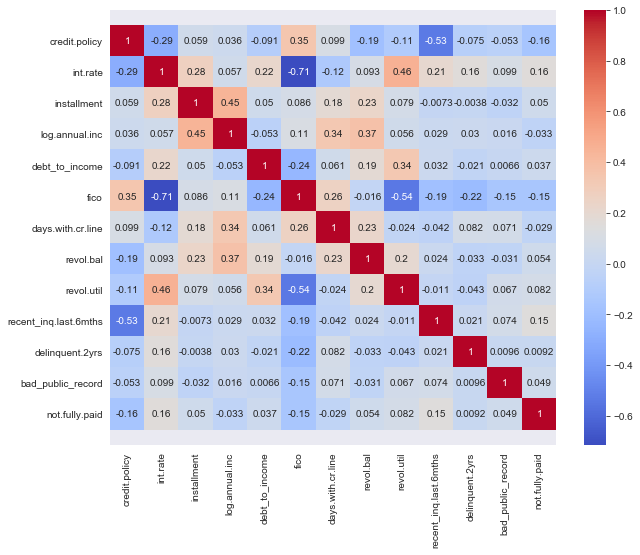

In [20]:
dataset_cor = dataset.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(dataset_cor,annot= True, cmap= 'coolwarm')
top,bot = ax.get_ylim()
ax.set_ylim(top+0.5, bot-0.5)
plt.show()

From the above we can seen that there are several features that have a good correlation

 - credit.policy
 - int.rate
 - fico
 - recent_inq.last.6mths

### 3.1.2 ANOVA Approach

In [21]:
xnum = dataset[numerical_feature]
y = dataset['not.fully.paid']

from sklearn.feature_selection import f_classif

fval,pval = f_classif(xnum,y)

for i in range(len(xnum.columns)):
    print(numerical_feature[i], " ", pval[i])

int.rate   1.2205604780444713e-55
installment   1.001260965044595e-06
log.annual.inc   0.0011248018250969915
debt_to_income   0.0002549163767584047
fico   4.227100097986569e-49
days.with.cr.line   0.004853446448464754
revol.bal   1.4522130187420675e-07
revol.util   1.1375311211896864e-15
recent_inq.last.6mths   3.0018027414022358e-49
delinquent.2yrs   0.366974434940197


Based on ANOVA the important feature are:
- log.annual.inc
- debt_to_income
- days.with.cr.line

### 3.1.3 Chi Square Test Approach

In [22]:
xcat = dataset[categorical_feature]
from sklearn.preprocessing import LabelEncoder

xcat.loan_purpose = LabelEncoder().fit_transform(xcat.loan_purpose)

from sklearn.feature_selection import chi2
cval,pval = chi2(xcat,y)

for i in range(len(categorical_feature)):
    print(categorical_feature[i], " ", pval[i])

credit.policy   8.259775651518323e-12
loan_purpose   1.4102828766145098e-08
bad_public_record   4.4231854071676384e-07


/Users/rahulmuliana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Based on ANOVA the important feature are:
- credit.policy
- loan_purpose
- bad_public_record

In [23]:
dataset.columns

Index(['credit.policy', 'loan_purpose', 'int.rate', 'installment',
       'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'recent_inq.last.6mths', 'delinquent.2yrs',
       'bad_public_record', 'not.fully.paid'],
      dtype='object')

In [24]:
# Feature that we use

x = dataset[['credit.policy','loan_purpose','int.rate','log.annual.inc','debt_to_income',
            'fico','days.with.cr.line','recent_inq.last.6mths','bad_public_record']]
y = dataset['not.fully.paid']

# 4. Preprocessing Data

In [25]:
x.head(10)

,credit.policy,loan_purpose,int.rate,log.annual.inc,debt_to_income,fico,days.with.cr.line,recent_inq.last.6mths,bad_public_record
0,1,debt_consolidation,0.1189,11.350407,19.48,737,5639.958333,0.0,0.0
1,1,credit_card,0.1071,11.082143,14.29,707,2760.000000,0.0,0.0
2,1,debt_consolidation,0.1357,10.373491,11.63,682,4710.000000,1.0,0.0
3,1,debt_consolidation,0.1008,11.350407,8.10,712,2699.958333,1.0,0.0
4,1,credit_card,0.1426,11.299732,14.97,667,4066.000000,0.0,0.0
5,1,credit_card,0.0788,11.904968,16.98,727,6120.041667,0.0,0.0
6,1,debt_consolidation,0.1496,10.714418,4.00,667,3180.041667,0.0,1.0
7,1,all_other,0.1114,11.002100,11.08,722,5116.000000,0.0,0.0
8,1,home_improvement,0.1134,11.407565,17.25,682,3989.000000,1.0,0.0
9,1,debt_consolidation,0.1221,10.203592,10.00,707,2730.041667,1.0,0.0


In [26]:
x.columns

Index(['credit.policy', 'loan_purpose', 'int.rate', 'log.annual.inc',
       'debt_to_income', 'fico', 'days.with.cr.line', 'recent_inq.last.6mths',
       'bad_public_record'],
      dtype='object')

In [27]:
x.loan_purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

## 4.1 Encoding Process

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
# Loan Purpose feature

from sklearn.preprocessing import StandardScaler
encoder = ColumnTransformer([("ohe", OneHotEncoder(),[1]),("sc", StandardScaler(),[0,3,4,5])], remainder='passthrough')
encoder.fit(x)
x2 = encoder.transform(x)
x2.shape

(9578, 15)

In [30]:
# Change it into DataFrame

x2 = pd.DataFrame(x2)
x2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.492222,0.681011,0.998505,0.688825,0.1189,5639.958333,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.492222,0.244508,0.244540,-0.101303,0.1071,2760.000000,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.492222,-0.908567,-0.141885,-0.759742,0.1357,4710.000000,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.492222,0.681011,-0.654697,0.030385,0.1008,2699.958333,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.492222,0.598556,0.343326,-1.154806,0.1426,4066.000000,0.0,0.0


## 4.2 Splitting Data into Train Dataset and Test Dataset

In [31]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=5)

print(x2.shape)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(9578, 15)
(7662, 15)
(1916, 15)
(7662,)
(1916,)


# 5. Applied into Machine Learning - Decision Tree Model

In [811]:
from sklearn.tree import DecisionTreeClassifier
model_loans = DecisionTreeClassifier(criterion='gini',
                                     max_depth=38,
                                     min_samples_leaf=10,
                                     min_samples_split=30)

In [812]:
# Train model with train dataset

model_loans.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=38, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 5.1 Model Implementation

In [861]:
# Bad Credit Example
new_customer_1 = [[0,'small_business',0.20,10,30,518,7000,5,5]]
new_customer_1 = encoder.transform(new_customer_1)
model_loans.predict(new_customer_1)

array([1])

In [865]:
# Good Credit Example
new_customer_2 = [[1,'credit_card',0.10,11,6,134,1500,5,1]]
new_customer_2 = encoder.transform(new_customer_2)
model_loans.predict(new_customer_2)

array([0])

# 6. Performance Analysis

In [813]:
from sklearn import metrics

ypred = model_loans.predict(xtest)
metrics.accuracy_score(ytest,ypred)

0.8162839248434238

In [814]:
# Recall on train data
metrics.recall_score(ytrain,model_loans.predict(xtrain))

0.25181598062953997

In [815]:
# Recall on test data
metrics.recall_score(ytest,model_loans.predict(xtest))

0.1054421768707483

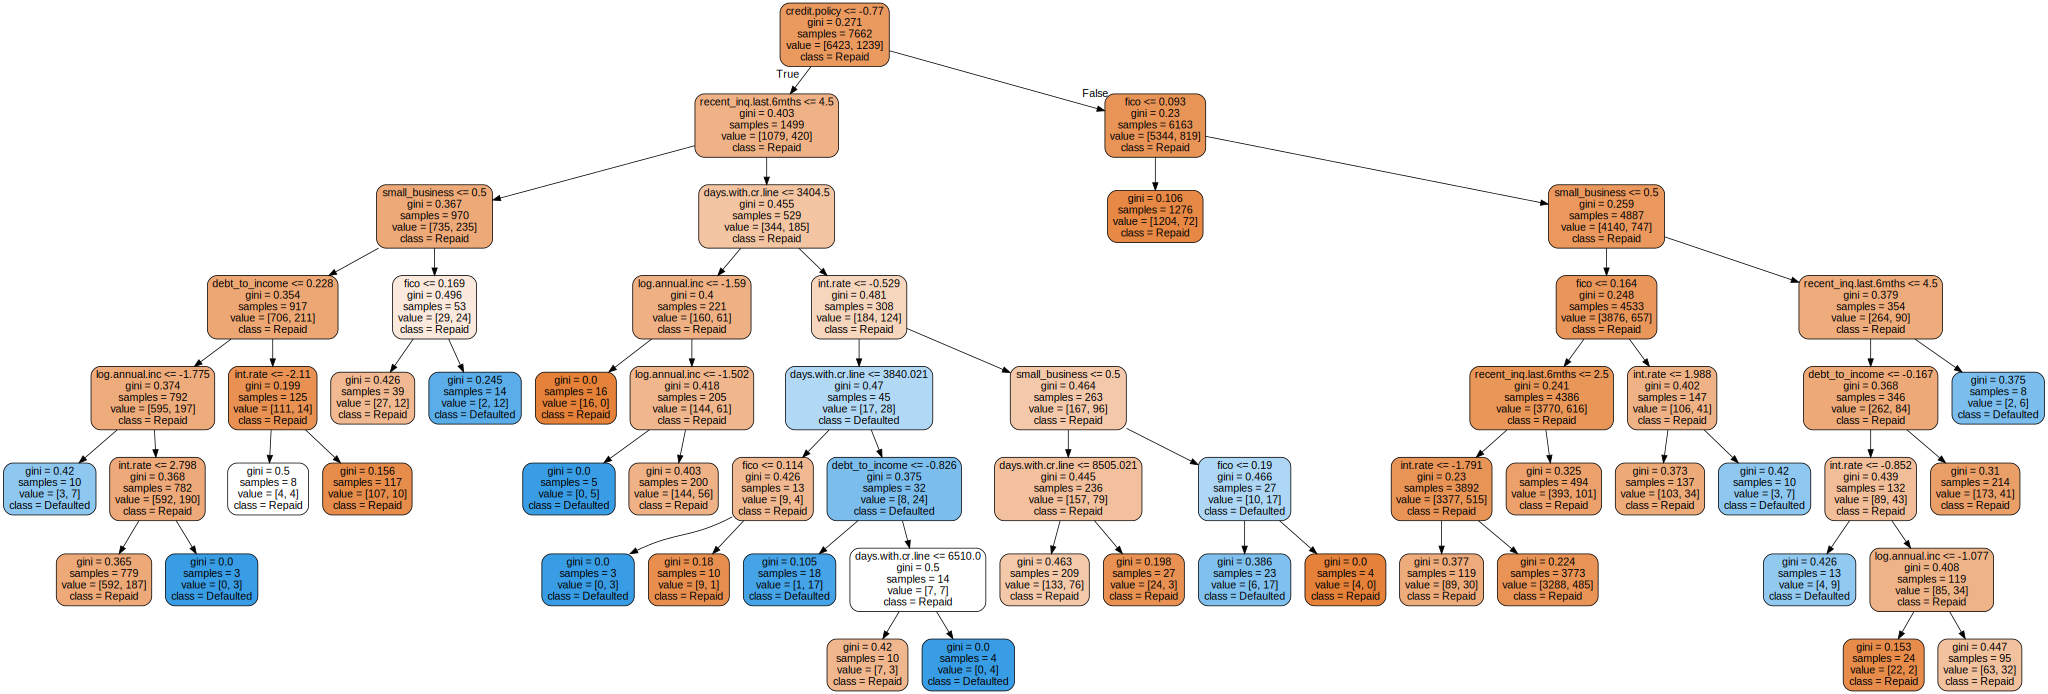

In [40]:
import graphviz
from sklearn import tree

features_names =['all_other','credit_card','debt_consolidation','educational','home_improvement','major_purchase',
                'small_business','credit.policy','int.rate','log.annual.inc','debt_to_income','fico','days.with.cr.line',
                 'recent_inq.last.6mths','bad_public_record'] 
class_names = ['Repaid','Defaulted']

graph_data = tree.export_graphviz(model_loans,feature_names=features_names, class_names=class_names,
                                 rounded=True, filled=True)

graph = graphviz.Source(graph_data)
graph